In [ ]:
# import necesssary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, make_scorer

## The main error function (Mean Adjusted Power Error)
$Mean Adjusted Power Error = \frac{1}{N}\sum_{i=1}^n|\hat{y}_i-y_i|^{exp}$

$exp = 2 - tanh(\frac{y_i-a}{b})\times(\frac{\hat{y}_i-y_i}{c})$

$a: center, b:critical range, c:slope$



In [ ]:
def mean_adjusted_power_error(y_true, y_pred, center=125, critical_range=55, slope=100, verbose=False):
    def exponent(y_hat: float, y_i: float, a=center, b=critical_range, c=slope) -> float:
        return 2-np.tanh(((y_i-a)/b))*((y_hat-y_i)/c)
    sum_=0
    for i in range(len(y_true)):
        exp = exponent(y_pred[i], y_true[i])
        if verbose:
            print(exp)
        sum_ += abs((y_pred[i]-y_true[i]))**exp
    return sum_/len(y_true)



In [ ]:
mean_adjusted_power_error([50], [40], verbose=True)

1.9122766214806983


81.71026546852883

In [ ]:
mean_adjusted_power_error([50], [60], verbose=True)

2.0877233785193017


122.3836435074557

In [ ]:
y_true = [60., 120., 340.]
y_pred = [80., 130., 350.]

In [ ]:
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
rmse

14.142135623730951

In [ ]:
np.seterr('raise')
mape = mean_adjusted_power_error(y_true, y_pred)
mape

279.4945162619791

In [ ]:
rmape = np.sqrt(spe)
rmape

16.718089491983797

In [ ]:
error  = make_scorer(adjusted_mean_squared_error, greater_is_better=False)


In [ ]:
def show_per_true_value(value,value_range):
    prediction = np.arange(value - value_range,value + value_range)
    errors=[]
    mse=[]
    for pred in prediction:
        errors.append(mean_adjusted_power_error([value], [pred]))
        mse.append(mean_squared_error([value], [pred]))
    plt.plot(prediction, errors, label='mape')
    plt.plot(prediction, mse, label='mse', ls='dotted')
    plt.axvline(value, label='True Value', color='k', ls='--')
    plt.xlabel('Predicted Value')
    plt.ylabel('Error')
    plt.title('{} +- {}'.format(value, value_range))
    plt.legend()
    plt.show()

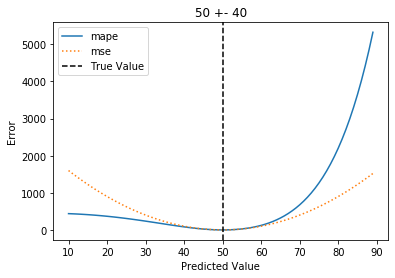

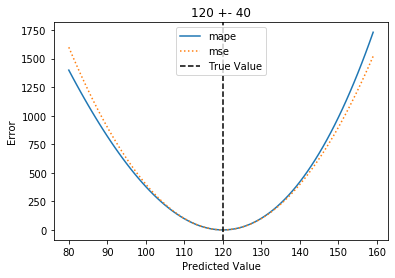

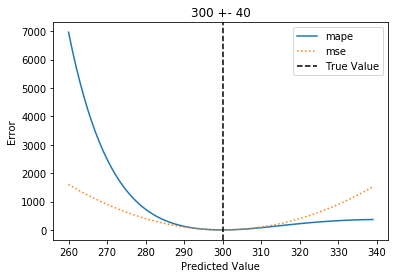

In [ ]:
show_per_true_value(50, 40)
show_per_true_value(120, 40)
show_per_true_value(300, 40)
